In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from scipy import stats
from scipy.stats import zscore
import requests
import seaborn as sns
from matplotlib import colors as mcolors
from sklearn.manifold import TSNE
import warnings
import matplotlib.cbook



warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
# read each dataset to dataframe
Unemployment = pd.read_csv('./Eco_Data/Unemployment Rate .csv', skiprows= [0,1,2,3,4])
Unemployment = Unemployment.rename({'Data': 'Unemployment_Rate'}, axis=1)

Poverty = pd.read_csv('./Eco_Data/Poverty.csv', skiprows= [0,1,2,3,4])
Poverty = Poverty.rename({'Data': 'Poverty'}, axis=1)

Employment_Population = pd.read_csv('./Eco_Data/Employment Population Ratio.csv', skiprows= [0,1,2,3,4])
Employment_Population = Employment_Population.rename({'Data': 'Employment_Population'}, axis=1)

Uninsured = pd.read_csv('./Health/Uninsured.csv', skiprows= [0,1,2,3,4])
Uninsured = Uninsured.rename({'Data': 'Uninsured'}, axis=1)

Family_Income = pd.read_csv('./Eco_Data/Family Income.csv', skiprows= [0,1,2,3,4])
Family_Income = Family_Income.rename({'Data': 'Family_Income'}, axis=1)

Educational_Attainment = pd.read_csv('./Eco_Data/Educational Attainment.csv', skiprows= [0,1,2,3,4])
Educational_Attainment = Educational_Attainment.rename({'Data': 'Educational_Attainment'}, axis=1)



In [3]:
# # only look for the Borough data
# Unemployment = Unemployment[(Unemployment['Location'] == 'Bronx' ) |
#                             (Unemployment['Location'] == 'Brooklyn' )|
#                             (Unemployment['Location'] == 'Manhattan' )| 
#                             (Unemployment['Location'] == 'Queens')| 
#                             (Unemployment['Location'] == 'Staten Island')]

# Poverty = Poverty[(Poverty['Location'] == 'Bronx' ) | 
#                   (Poverty['Location'] == 'Brooklyn' )|
#                   (Poverty['Location'] == 'Manhattan' )| 
#                   (Poverty['Location'] == 'Queens')|
#                   (Poverty['Location'] == 'Staten Island')]

# Employment_Population = Employment_Population[(Employment_Population['Location'] == 'Bronx' ) | 
#                                               (Employment_Population['Location'] == 'Brooklyn' )|
#                                               (Employment_Population['Location'] == 'Manhattan' )| 
#                                               (Employment_Population['Location'] == 'Queens')|
#                                               (Employment_Population['Location'] == 'Staten Island')]

# Uninsured = Uninsured[(Uninsured['Location'] == 'Bronx' ) | 
#                                               (Uninsured['Location'] == 'Brooklyn' )|
#                                               (Uninsured['Location'] == 'Manhattan' )| 
#                                               (Uninsured['Location'] == 'Queens')|
#                                               (Uninsured['Location'] == 'Staten Island')]

# Family_Income = Family_Income[(Family_Income['Location'] == 'Bronx' ) | 
#                                               (Family_Income['Location'] == 'Brooklyn' )|
#                                               (Family_Income['Location'] == 'Manhattan' )| 
#                                               (Family_Income['Location'] == 'Queens')|
#                                               (Family_Income['Location'] == 'Staten Island')]

# Educational_Attainment = Educational_Attainment[(Educational_Attainment['Location'] == 'Bronx' ) | 
#                                               (Educational_Attainment['Location'] == 'Brooklyn' )|
#                                               (Educational_Attainment['Location'] == 'Manhattan' )| 
#                                               (Educational_Attainment['Location'] == 'Queens')|
#                                               (Educational_Attainment['Location'] == 'Staten Island')]

Unemployment = Unemployment[(Unemployment['Location'] != 'New York City' )]
Poverty = Poverty[(Poverty['Location'] != 'New York City' )]
Employment_Population = Employment_Population[(Employment_Population['Location'] != 'New York City' )]
Uninsured = Uninsured[(Uninsured['Location'] != 'New York City' )]
Family_Income = Family_Income[(Family_Income['Location'] != 'New York City' )]
Educational_Attainment = Educational_Attainment[(Educational_Attainment['Location'] != 'New York City' )]

In [4]:
# find the common colunm and get the proper infomation 
Poverty = Poverty[(Poverty['DataFormat'] == 'Number' )]

# All age
Uninsured = Uninsured[(Uninsured['Age Group'] == 'All Ages' )&
                      (Uninsured['DataFormat'] == 'Number' )]
# Income Level under $15,000
Family_Income = Family_Income[(Family_Income['Income Level'] == 'Under $15,000' ) &
                             (Family_Income['DataFormat'] == 'Number' )]
# Less than High School Degree 
Educational_Attainment = Educational_Attainment[(Educational_Attainment['Education Level'] == 
                                                 'Less than High School Degree') &
                                                (Educational_Attainment['DataFormat'] == 'Number' )]
Educational_Attainment.head()

,Location,Education Level,TimeFrame,DataFormat,Educational_Attainment,Fips
0,Riverdale,Less than High School Degree,2017,Number,13845.00000,208
1,Williamsbridge,Less than High School Degree,2017,Number,20069.00000,212
2,Throgs Neck,Less than High School Degree,2017,Number,12268.00000,210
3,Pelham Parkway,Less than High School Degree,2017,Number,17150.00000,211
4,Morrisania,Less than High School Degree,2017,Number,20471.57803,203


In [5]:
# merge the data to one dataframe
df = pd.merge(Unemployment, Poverty,on = [ "TimeFrame","Fips","Location"] )
df = pd.merge(df, Employment_Population,on = [ "TimeFrame","Fips","Location"] )
df = pd.merge(df, Uninsured,on = [ "TimeFrame","Fips","Location"] )
df = pd.merge(df, Family_Income,on = [ "TimeFrame","Fips","Location"] )
df = pd.merge(df, Educational_Attainment,on = [ "TimeFrame","Fips","Location"] )
df = df[(df['Location'] != 'Bronx' ) &
                            (df['Location'] != 'Brooklyn' )&
                            (df['Location'] != 'Manhattan' )&
                            (df['Location'] != 'Queens')& 
                            (df['Location'] != 'Staten Island')]

df.head()

,Location,TimeFrame,DataFormat_x,Unemployment_Rate,Fips,DataFormat_y,Poverty,DataFormat_x,Employment_Population,Age Group,DataFormat_y,Uninsured,Income Level,DataFormat_x,Family_Income,Education Level,DataFormat_y,Educational_Attainment
5,Riverdale,2008,Percent,0.06466,208,Number,16827.00000,Percent,0.587,All Ages,Number,17462.00000,"Under $15,000",Number,3058.00000,Less than High School Degree,Number,14900.000
6,Williamsbridge,2008,Percent,0.08946,212,Number,24072.00000,Percent,0.568,All Ages,Number,24378.00000,"Under $15,000",Number,4240.00000,Less than High School Degree,Number,21048.000
7,Throgs Neck,2008,Percent,0.07788,210,Number,10479.00000,Percent,0.571,All Ages,Number,10435.00000,"Under $15,000",Number,2017.00000,Less than High School Degree,Number,15526.000
8,Pelham Parkway,2008,Percent,0.06349,211,Number,25535.00000,Percent,0.547,All Ages,Number,21867.00000,"Under $15,000",Number,3804.00000,Less than High School Degree,Number,23161.000
9,Morrisania,2008,Percent,0.12480,203,Number,31075.03645,Percent,0.464,All Ages,Number,11439.58219,"Under $15,000",Number,5593.07602,Less than High School Degree,Number,16673.433


In [6]:
# result_df = df.drop_duplicates(subset=['Location'], keep='first')
# global Location_name 
# Location_name = result_df['Location'].tolist()
# print(len(Location_name))

In [7]:
#Aplly Z-score
df1 = df
df1 = df1[df1.columns[df1.columns.isin(['Unemployment_Rate', 'Poverty','Employment_Population','Uninsured',
                                        'Family_Income','Educational_Attainment'])]]

df1 = df1.dropna(how='any') # drop nan entries
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)] # remove outliers
df1 = df1.apply(zscore) # Normalization
df['Unemployment_Rate'] = df1['Unemployment_Rate']
df['Poverty'] = df1['Poverty']
df['Employment_Population'] = df1['Employment_Population']
df['Uninsured'] = df1['Uninsured']
df['Family_Income'] = df1['Family_Income']
df['Educational_Attainment'] = df1['Educational_Attainment']
df_test = df

# 0-11 bronx
# 12-23 Manhattan
# 24-26 Staten Island
# 27-44 Brooklyn
# 45-58 Queens

CD_Name = df_test[df_test['TimeFrame'] == 2008]['Location'].values.tolist()


Borough = list()

for i in range(59):
    if i < 12:
        Borough.append('Bronx')
    elif i > 11 and i < 24:
         Borough.append('Manhattan')
    elif i > 23 and i < 27:
         Borough.append('Staten Island')
    elif i > 26 and i < 45:
         Borough.append('Brooklyn')
    else:
        Borough.append('Queens')

Location_ = df_test['Location'].values.tolist()
len_L = len(Location_)
CD_Boro = {CD_Name[i]: Borough[i] for i in range(len(CD_Name))}
Get_Borough = [None] * len_L
for x in range(len_L):
    for i, n in CD_Boro.items():
        if Location_[x] in i:
            Get_Borough[x] = n

    

df_test['Borough'] = Get_Borough

df = df_test


In [8]:
def pca_lda (df,year):
        features = ['Unemployment_Rate','Poverty','Employment_Population','Uninsured',
                   'Family_Income','Educational_Attainment']
   
        
        # Set up the target or y for LDA training 
        # y = df.loc[:,['TimeFrame']].values # change to location
        y = df.loc[:,['Borough']].values # change to location
     
        # Target name
        # targets = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
        targets = ['Bronx','Brooklyn' ,'Manhattan' ,'Queens', 'Staten Island']
#         targets = Location_name
        for n in range(0,len(y)):
            for i in range(len(targets)):
                if y[n] == targets[i]:
                    y[n] = targets.index(targets[i])

        
        
        # set to contiguous flattened array
        y = y.ravel()
        # set the data type to integer
        y = y.astype('int')
      
        # Separate the features from the dataset
        X = df.loc[:,features].values
       
       
        target_names = targets
        # Principal component analysis
        pca = PCA(n_components=2)
        X_r = pca.fit(X).transform(X)
     
        
      
     
    
        # Percentage of variance explained for each components
        print('explained variance ratio (first two components): %s'
              % str(pca.explained_variance_ratio_))
        #print(pca.explained_variance_ratio_.cumsum())
        plt.figure()
#         colors = ['r', 'g', 'b', 'y','m','crimson','khaki','azure' ,'black','grey','cyan']
#         colors =  mcolors.CSS4_COLORS
        lw = 2
        num_range = np.arange(len(target_names))
      
          
        for i, target_name in zip([0,1,2,3,4] , target_names):
            plt.scatter(X_r[y == i, 0], X_r[y == i, 1], cmap='tab20b', alpha=.8, lw=lw,
                        label=target_name)
        plt.legend(loc='best', shadow=False, scatterpoints=1)
        
        plt.title( year + ' PCA of Economic, Education and Health dataset')

        # Linear Discriminant Analysis
#         plt.figure()
#         lda = LinearDiscriminantAnalysis()
#         lda.fit(X, y)
        # Plotting the Cumulative Summation of the Explained Variance
#         plt.figure()
#         plt.plot(np.cumsum(lda.explained_variance_ratio_))
#         plt.xlabel('Number of Components')
#         plt.ylabel('Cumulative Explained Variance')  # for each component
#         plt.title('Segmentation Dataset Explained Variance')
#         plt.show(block=True)
        lda = LinearDiscriminantAnalysis(n_components=4)
        lda.fit(X, y)
        trainX_lda = lda.transform(X)

        # Plot Pairwise relationship between LDA components
     
        
        visualizedf = pd.DataFrame(trainX_lda, columns=['LDA1', 'LDA2','LDA3','LDA4'])
        visualizedf['LABELS'] = df['Borough'].values.tolist()
        print(visualizedf.sample(n=4))
     
        g = sns.pairplot(visualizedf, vars=visualizedf.columns[:-1], hue="LABELS", palette="tab10")
        g.fig.subplots_adjust(top=0.9)
        g.fig.suptitle(year + ' LDA of Economic, Education and Health dataset')
        plt.show(block=True)
        
      

       
# best
# 	upper right
# 	upper left
# 	lower left
# 	lower right
# 	right
# 	center left
# 	center right
# 	lower center
# 	upper center
# 	center




In [41]:
def t_SNE(df):
    features = ['Unemployment_Rate','Poverty','Employment_Population','Uninsured',
                   'Family_Income','Educational_Attainment']
   
        
    # Set up the target or y for LDA training 
    # y = df.loc[:,['TimeFrame']].values # change to location
    y = df.loc[:,['Borough']].values # change to location
     
    # Target name
    # targets = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    targets = ['Bronx','Brooklyn' ,'Manhattan' ,'Queens', 'Staten Island']
    # targets = Location_name
    for n in range(0,len(y)):
        for i in range(len(targets)):
            if y[n] == targets[i]:
                y[n] = targets.index(targets[i])

        

    # set to contiguous flattened array
    y = y.ravel()
    # set the data type to integer
    trainY = y.astype('int')
      
    # Separate the features from the dataset
    trainX = df.loc[:,features].values
       
       
    target_names = targets
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(trainX, trainY)
    # transform the data onto the first two principal components
    trainX_lda = lda.transform(trainX)
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E"]
    plt.figure(figsize=(10, 10))
    plt.xlim(trainX_lda[:, 0].min(), trainX_lda[:, 0].max())
    plt.ylim(trainX_lda[:, 1].min(), trainX_lda[:, 1].max())
    for i in range(len(trainX_lda)):
        # actually plot the digits as text instead of using scatter
        plt.text(trainX_lda[i, 0], trainX_lda[i, 1], str(targets[trainY[i]]),
                 color=colors[trainY[i]], fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("LDA 0")
    plt.ylabel("LDA 1")
    plt.xlim([-4, 3])
    plt.ylim([-4, 3])
    plt.show(block=True)

    # Apply tSNE from Manifold learning for better visualization
    tsne = TSNE(random_state=21)
    # use fit_transform instead of fit, as TSNE has no transform method
    trainX_tsne = tsne.fit_transform(trainX)
    plt.figure(figsize=(10, 10))
    plt.xlim(trainX_tsne[:, 0].min(), trainX_tsne[:, 0].max())
    plt.ylim(trainX_tsne[:, 1].min(), trainX_tsne[:, 1].max())
    for i in range(len(trainX_tsne)):
        # actually plot the digits as text instead of using scatter
        plt.text(trainX_tsne[i, 0], trainX_tsne[i, 1], str(targets[trainY[i]]),
                 color=colors[trainY[i]],fontdict={'weight': 'bold', 'size': 9})
    plt.xlim([-15, -4])
    plt.ylim([-3, 3])
    plt.xlabel("t-SNE feature 0")
    plt.ylabel("t-SNE feature 1")
   
    plt.show(block=True)

In [10]:
# Separate the timeframe of dataset to year-long dataset

df = df.dropna()
df = df.reset_index(drop=True)
df_2008 = df[(df['TimeFrame'] == 2008)]


df_2019 = df[(df['TimeFrame'] == 2019)]



explained variance ratio (first two components): [0.65213953 0.18557509]
        LDA1      LDA2      LDA3      LDA4     LABELS
29  0.411118  1.632346  0.083760 -0.432695   Brooklyn
51 -2.641045 -1.144910  0.459169 -0.169681     Queens
43  1.390309 -0.536102 -0.166424 -0.920466   Brooklyn
12  1.457202 -2.024551 -3.391525 -2.377067  Manhattan


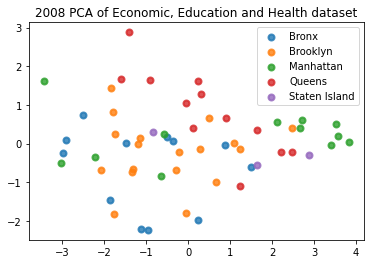

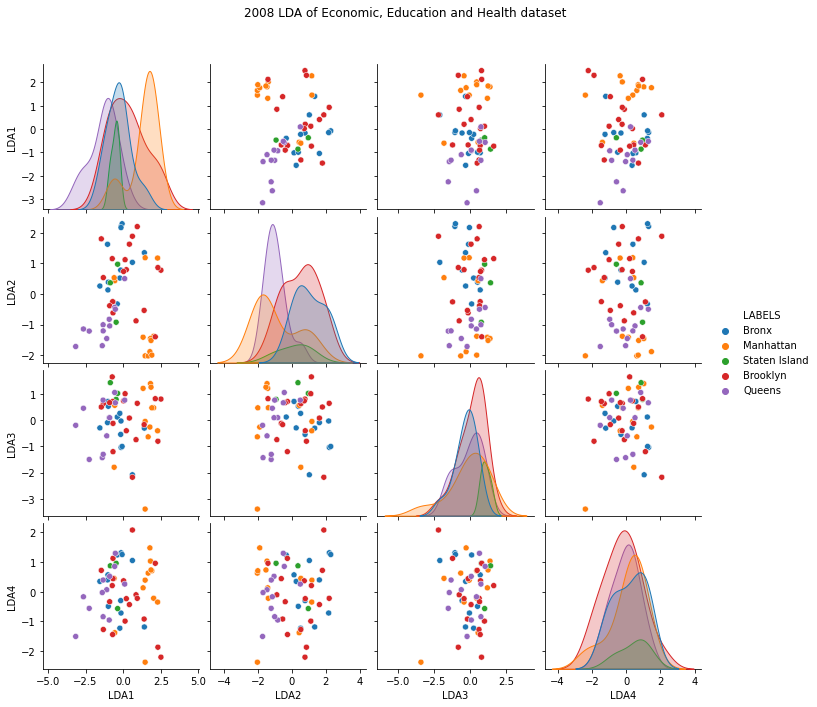

In [11]:

pca_lda(df_2008,'2008')


explained variance ratio (first two components): [0.60894844 0.21246792]
        LDA1      LDA2      LDA3      LDA4     LABELS
21  1.716290  0.345214  1.332364  0.678337      Bronx
3  -1.814861 -1.722134  0.889180  0.055333  Manhattan
18  0.712745  0.639042  0.115759  1.480098      Bronx
49 -0.106320  1.383237  0.798071  0.269951     Queens


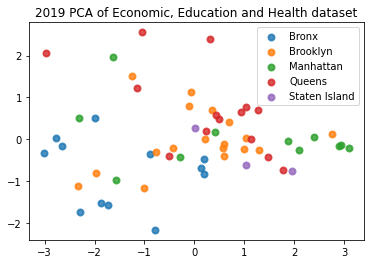

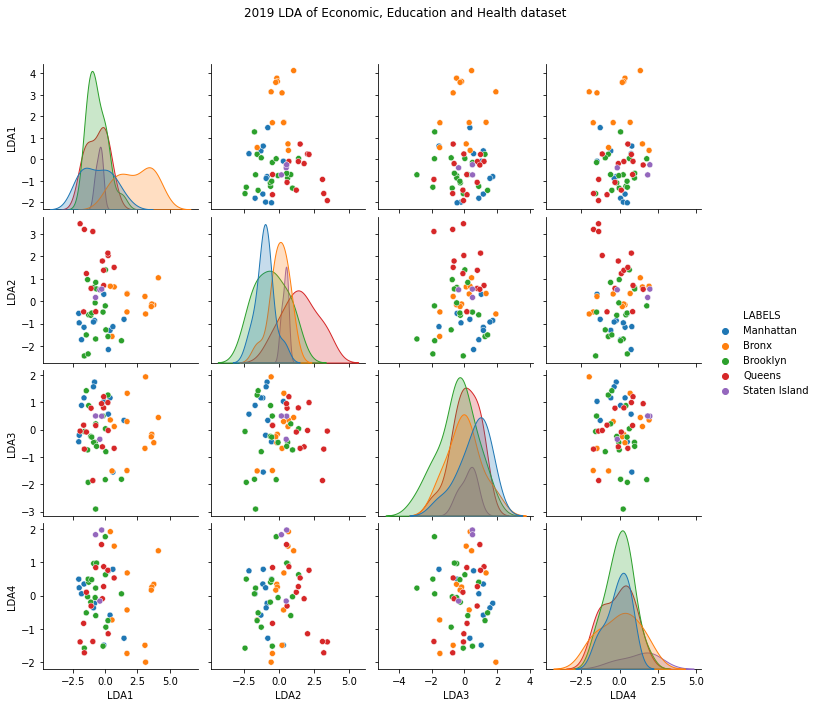

In [12]:

pca_lda(df_2019, '2019')


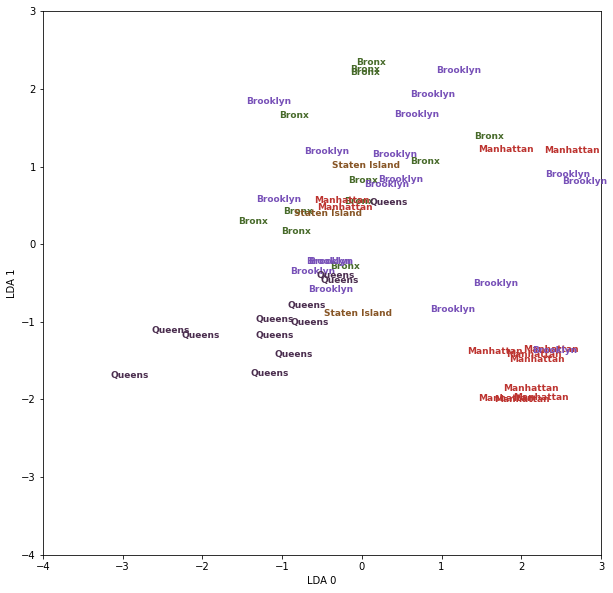

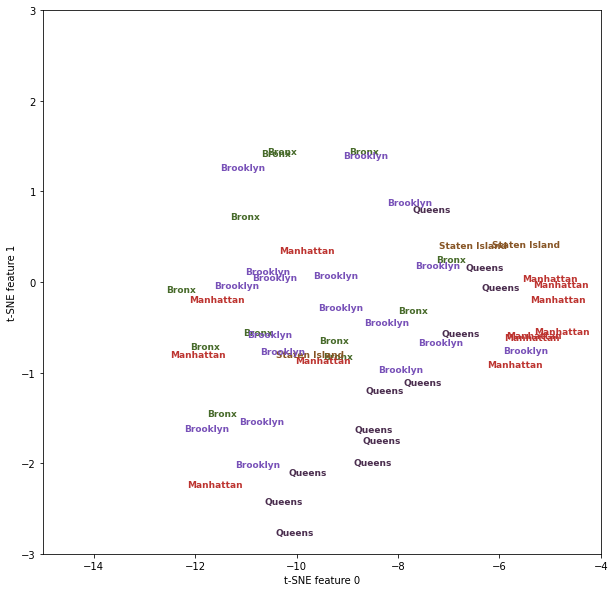

In [42]:
t_SNE(df_2008)

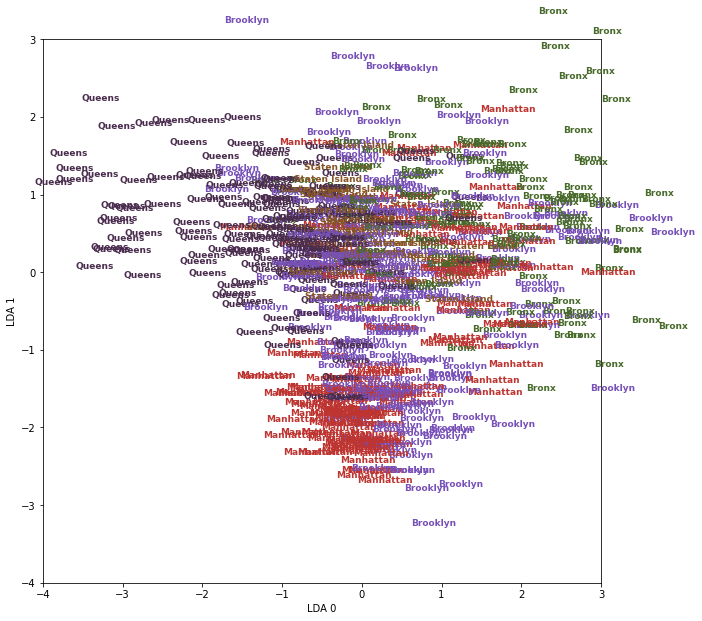

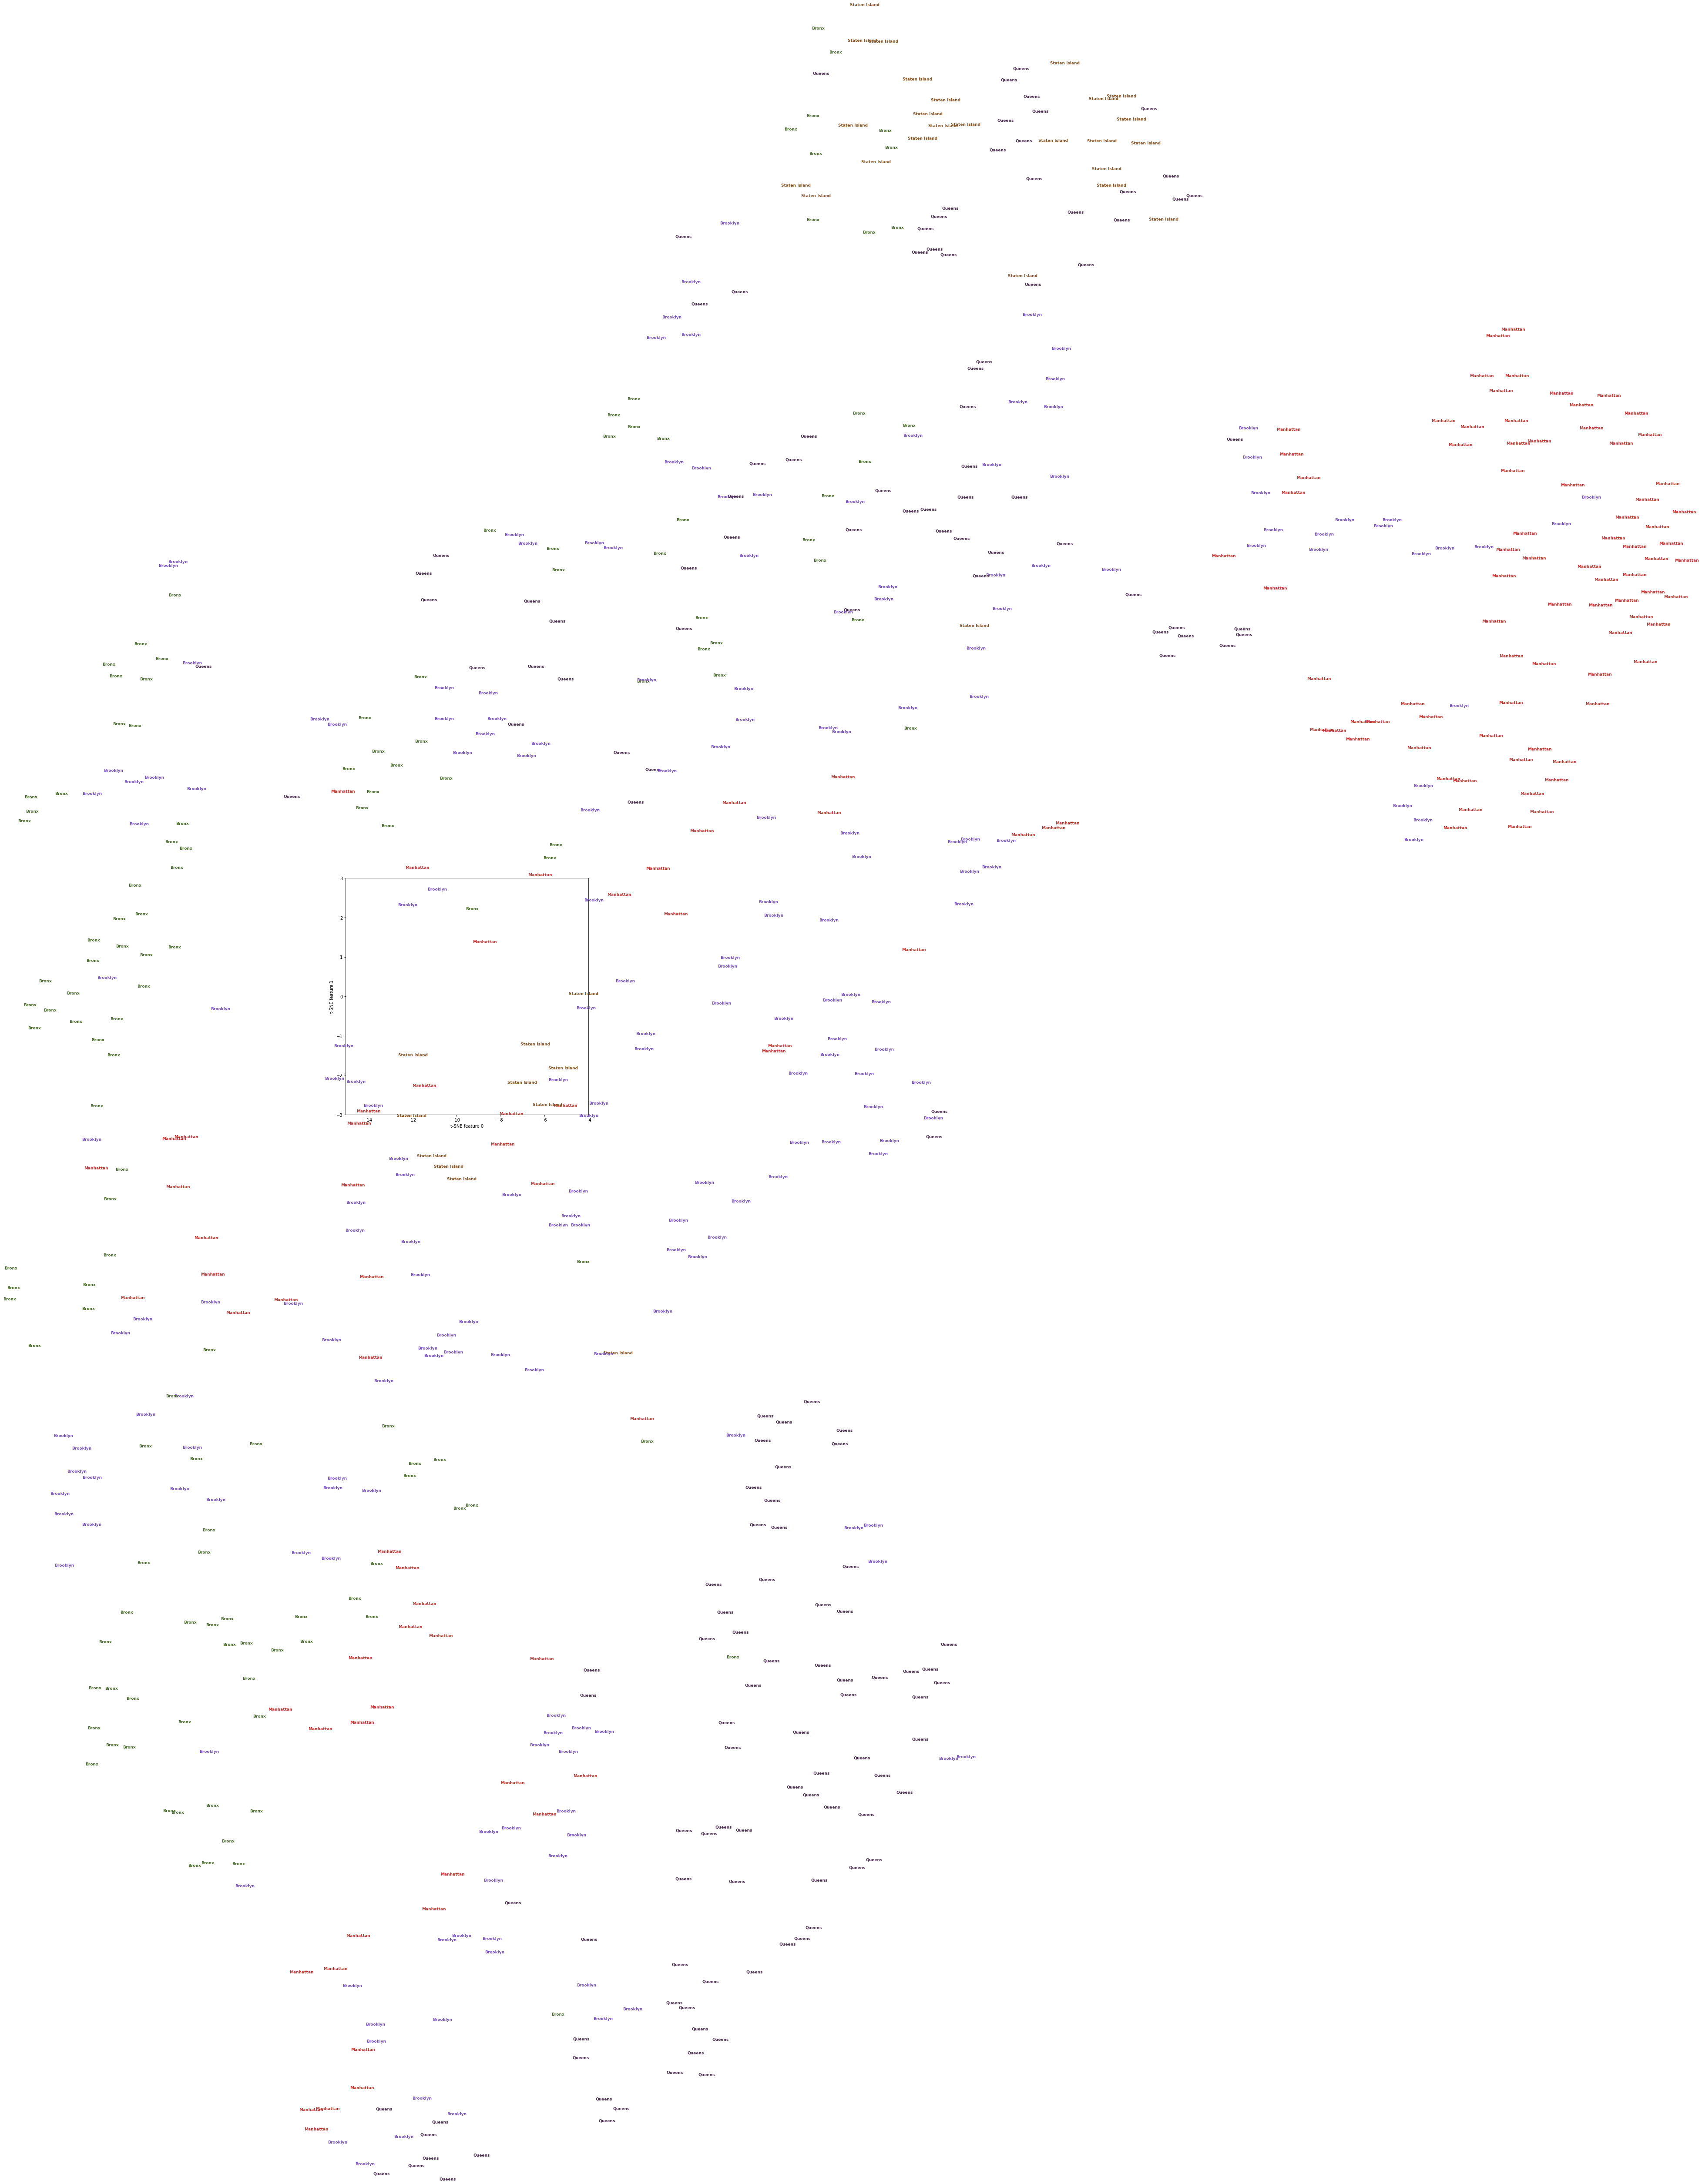

In [43]:
t_SNE(df)

In [15]:
features = ['Unemployment_Rate','Poverty','Employment_Population','Uninsured',
                   'Family_Income','Educational_Attainment']
def Cor_Circle(X):
    X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended


    figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                            features,
                                                            dimensions=(1, 2),
                                                            figure_axis_size=10)
    print(correlation_matrix)



                           Dim 1     Dim 2
Unemployment_Rate      -0.681186  0.392691
Poverty                -0.910233 -0.017016
Employment_Population   0.638959 -0.603272
Uninsured              -0.668307 -0.683236
Family_Income          -0.934993  0.131433
Educational_Attainment -0.853767 -0.355778


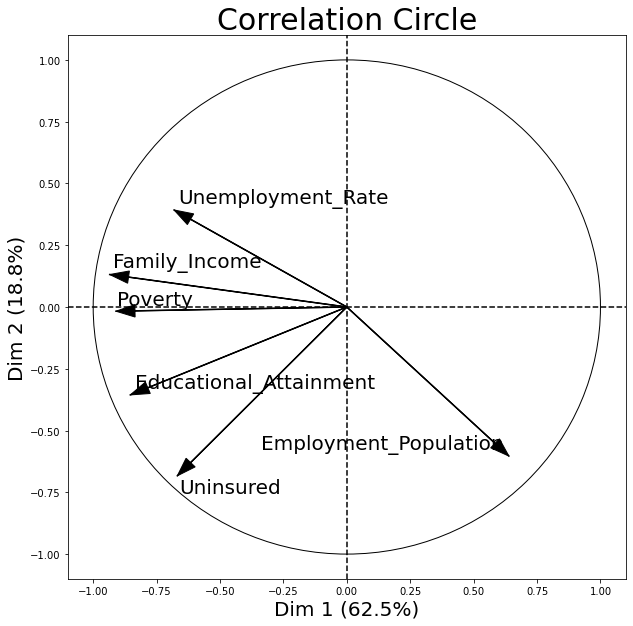

In [16]:
Cor_Circle(df_2008.loc[:,features].values)

                           Dim 1     Dim 2
Unemployment_Rate      -0.681763  0.462227
Poverty                -0.911390  0.088243
Employment_Population   0.706167 -0.420714
Uninsured              -0.542021 -0.785261
Family_Income          -0.913037  0.179306
Educational_Attainment -0.788334 -0.546382


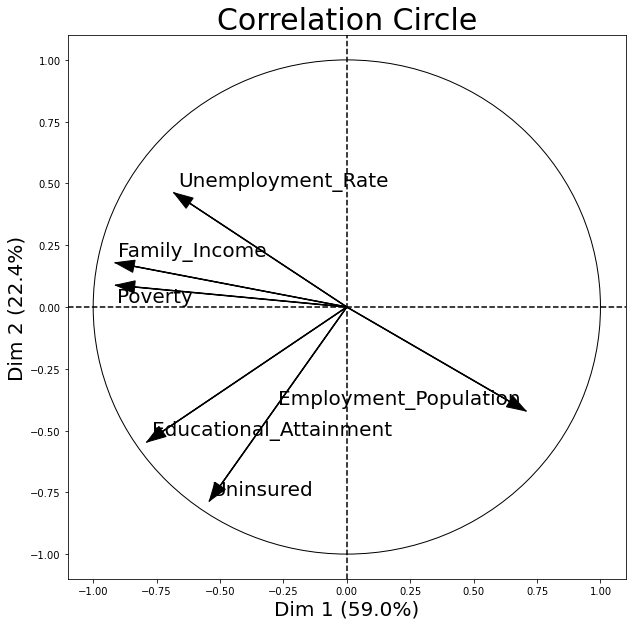

In [17]:
Cor_Circle(df_2019.loc[:,features].values)

In [44]:

features = ['Unemployment_Rate','Poverty','Employment_Population','Uninsured',
                   'Family_Income','Educational_Attainment']

pca = PCA()
components = pca.fit_transform(df_2019[features])

# pvr = pca.explained_variance_ratio_ * 100
# pvr = pvr.tolist()
# pvr2 = []
# for i in range(len(pvr)):
#     pvr[i] = float(pvr[i])
    
# for i in range(len(pvr)):
#     if pvr[i] >= 75:
#         pvr2.append(pvr[i])


labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100 )
}



fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df_2019["Borough"]
)

fig.update_traces(diagonal_visible=False)

fig.show()

In [19]:
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     dcc.Graph(id="graph"),
#     html.P("Different Year:"),
#      dcc.DatePickerRange(
#                             id='datepickerrange',
#                             start_date=df['TimeFrame'].min().date(),
#                             end_date=df['TimeFrame'].max().date(),
#                             min_date_allowed=df['TimeFrame'].min().date(),
#                             max_date_allowed=df['TimeFrame'].max().date())

# ])

In [20]:
# @app.callback(
#     Output("graph", "figure"), 
#     [Input("df", "value")])
# def run_and_plot(df):
   


#     pca = PCA(n_components=4)
    
#     components = pca.fit_transform(df[features])
#     var = pca.explained_variance_ratio_.sum() * 100

#     labels = {str(i): f"PC {i+1}" 
#               for i in range(n_components)}
#     labels['color'] = 'Location'
   

#     fig = px.scatter_matrix(
#         components,
#         color=df["Location"],
#         dimensions=range(4),
#         labels=labels,
#         title=f'Total Explained Variance: {var:.2f}%')
#     fig.update_traces(diagonal_visible=False)
#     return fig
# app.run_server(debug= False)




In [21]:
# import matplotlib as mpl

# from matplotlib import cm
# from colorspacious import cspace_converter
# from collections import OrderedDict

# cmaps = OrderedDict()
# cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
#                         'Dark2', 'Set1', 'Set2', 'Set3',
#                         'tab10', 'tab20', 'tab20b', 'tab20c']

In [22]:
# # Qualitative
# nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
# gradient = np.linspace(0, 1, 256)
# gradient = np.vstack((gradient, gradient))


# def plot_color_gradients(cmap_category, cmap_list, nrows):
#     fig, axes = plt.subplots(nrows=nrows)
  
#     fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
#     axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

#     for ax, name in zip(axes, cmap_list):
#         print(plt.get_cmap(name))
#         ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
#         pos = list(ax.get_position().bounds)
#         x_text = pos[0] - 0.01
#         y_text = pos[1] + pos[3]/2.
#         fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

#     # Turn off *all* ticks & spines, not just the ones with colormaps.
#     for ax in axes:
#         ax.set_axis_off()


# for cmap_category, cmap_list in cmaps.items():
#     plot_color_gradients(cmap_category, cmap_list, nrows)

# print(gradient)



In [23]:
# import plotly.graph_objects as go




# # Initialize figure
# fig = go.Figure()

# # Add Traces

# fig.add_trace(
#     px.scatter_matrix(
#         5,
#         color=df_2019["Location"],
#         name = '2019',
#         dimensions=range(5),
#         labels=labels,
#         title=f'Total Explained Variance: {var:.2f}%')

# fig.add_trace(
#     go.Scatter(x=list(df.index),
#                y=[df.High.mean()] * len(df.index),
#                name="High Average",
#                visible=False,
#                line=dict(color="#33CFA5", dash="dash")))

# fig.add_trace(
#     go.Scatter(x=list(df.index),
#                y=list(df.Low),
#                name="Low",
#                line=dict(color="#F06A6A")))

# fig.add_trace(
#     go.Scatter(x=list(df.index),
#                y=[df.Low.mean()] * len(df.index),
#                name="Low Average",
#                visible=False,
#                line=dict(color="#F06A6A", dash="dash")))

# # Add Annotations and Buttons
# high_annotations = [dict(x="2016-03-01",
#                          y=df.High.mean(),
#                          xref="x", yref="y",
#                          text="High Average:<br> %.3f" % df.High.mean(),
#                          ax=0, ay=-40),
#                     dict(x=df.High.idxmax(),
#                          y=df.High.max(),
#                          xref="x", yref="y",
#                          text="High Max:<br> %.3f" % df.High.max(),
#                          ax=0, ay=-40)]
# low_annotations = [dict(x="2015-05-01",
#                         y=df.Low.mean(),
#                         xref="x", yref="y",
#                         text="Low Average:<br> %.3f" % df.Low.mean(),
#                         ax=0, ay=40),
#                    dict(x=df.High.idxmin(),
#                         y=df.Low.min(),
#                         xref="x", yref="y",
#                         text="Low Min:<br> %.3f" % df.Low.min(),
#                         ax=0, ay=40)]

# fig.update_layout(
#     updatemenus=[
#         dict(
#             active=0,
#             buttons=list([
#                 dict(label="None",
#                      method="update",
#                      args=[{"visible": [True, False, True, False]},
#                            {"title": "Yahoo",
#                             "annotations": []}]),
#                 dict(label="High",
#                      method="update",
#                      args=[{"visible": [True, True, False, False]},
#                            {"title": "Yahoo High",
#                             "annotations": high_annotations}]),
#                 dict(label="Low",
#                      method="update",
#                      args=[{"visible": [False, False, True, True]},
#                            {"title": "Yahoo Low",
#                             "annotations": low_annotations}]),
#                 dict(label="Both",
#                      method="update",
#                      args=[{"visible": [True, True, True, True]},
#                            {"title": "Yahoo",
#                             "annotations": high_annotations + low_annotations}]),
#             ]),
#         )
#     ])

# # Set title
# fig.update_layout(title_text="Yahoo")

# fig.show()

In [24]:
# import plotly.graph_objects as go




# # Initialize figure
# fig = go.Figure()

# # Add Traces

# fig.add_trace(
#     go.Scatter(x=list(df.index),
#                y=list(df.High),
#                name="High",
#                line=dict(color="#33CFA5")))

# fig.add_trace(
#     go.Scatter(x=list(df.index),
#                y=[df.High.mean()] * len(df.index),
#                name="High Average",
#                visible=False,
#                line=dict(color="#33CFA5", dash="dash")))

# fig.add_trace(
#     go.Scatter(x=list(df.index),
#                y=list(df.Low),
#                name="Low",
#                line=dict(color="#F06A6A")))

# fig.add_trace(
#     go.Scatter(x=list(df.index),
#                y=[df.Low.mean()] * len(df.index),
#                name="Low Average",
#                visible=False,
#                line=dict(color="#F06A6A", dash="dash")))

# # Add Annotations and Buttons
# high_annotations = [dict(x="2016-03-01",
#                          y=df.High.mean(),
#                          xref="x", yref="y",
#                          text="High Average:<br> %.3f" % df.High.mean(),
#                          ax=0, ay=-40),
#                     dict(x=df.High.idxmax(),
#                          y=df.High.max(),
#                          xref="x", yref="y",
#                          text="High Max:<br> %.3f" % df.High.max(),
#                          ax=0, ay=-40)]
# low_annotations = [dict(x="2015-05-01",
#                         y=df.Low.mean(),
#                         xref="x", yref="y",
#                         text="Low Average:<br> %.3f" % df.Low.mean(),
#                         ax=0, ay=40),
#                    dict(x=df.High.idxmin(),
#                         y=df.Low.min(),
#                         xref="x", yref="y",
#                         text="Low Min:<br> %.3f" % df.Low.min(),
#                         ax=0, ay=40)]

# fig.update_layout(
#     updatemenus=[
#         dict(
#             active=0,
#             buttons=list([
#                 dict(label="None",
#                      method="update",
#                      args=[{"visible": [True, False, True, False]},
#                            {"title": "Yahoo",
#                             "annotations": []}]),
#                 dict(label="High",
#                      method="update",
#                      args=[{"visible": [True, True, False, False]},
#                            {"title": "Yahoo High",
#                             "annotations": high_annotations}]),
#                 dict(label="Low",
#                      method="update",
#                      args=[{"visible": [False, False, True, True]},
#                            {"title": "Yahoo Low",
#                             "annotations": low_annotations}]),
#                 dict(label="Both",
#                      method="update",
#                      args=[{"visible": [True, True, True, True]},
#                            {"title": "Yahoo",
#                             "annotations": high_annotations + low_annotations}]),
#             ]),
#         )
#     ])

# # Set title
# fig.update_layout(title_text="Yahoo")

# fig.show()